In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mne
import sklearn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, matthews_corrcoef, accuracy_score, balanced_accuracy_score
import os

In [2]:
### load all test dataset (6 people) and get mean values in confusion matrix


In [3]:
pred_path = 'predictions/BENDR-polid-AASM-hpf05_emg' #AASM_hpf1_emg' #
test_subjects = os.listdir(pred_path)

# AASM
labels = ['REM', 'Stadium 3', 'Stadium 2', 'Stadium 1', 'Wake', 'Mięśnie']
classes = [0, 1, 2, 3, 4, 5]

# R&K
# labels = ['REM', 'Stadium 4', 'Stadium 3', 'Stadium 2', 'Stadium 1', 'Wake', 'Mięśnie']
# classes = [0, 1, 2, 3, 4, 5, 6]

ACC = 0
BAC = 0
MCC = 0
conf_matrix = np.zeros((len(test_subjects)//2, len(labels), len(labels)))


for i, sub in enumerate(test_subjects):
    i //= 2
    
    if sub.split("_")[-1] == 'softmax.npy':
#         i //= 2
        continue
        
    # predicted tags
    in_and_out = np.load(os.path.join(pred_path, sub))

    y_true = in_and_out[0]
    y_BENDR = in_and_out[1]
    
    conf_matrix[i, : ,:] = confusion_matrix(y_true, y_BENDR, labels=classes, normalize='true') # true
    
    MCC += matthews_corrcoef(y_true, y_BENDR)
    ACC += accuracy_score(y_true, y_BENDR)
    BAC += balanced_accuracy_score(y_true, y_BENDR)
    
    print(i)
    print(accuracy_score(y_true, y_BENDR))
    print(balanced_accuracy_score(y_true, y_BENDR))

0
0.8200589970501475
0.7844548808052121
1
0.7048567870485679
0.6938782931363506
2
0.7479541734860884
0.6537497980909034
3
0.8181818181818182
0.7445945300684111
4
0.555895865237366
0.585054481833422
5
0.815480844409695
0.7928802060895636


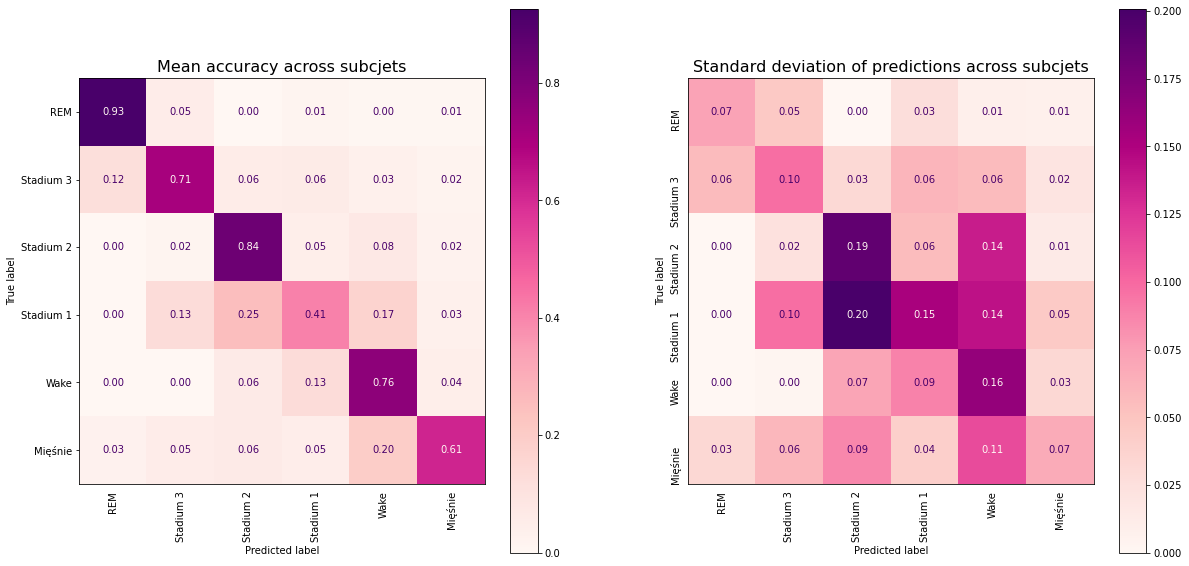

In [4]:
mean_conf = np.mean(conf_matrix, axis = 0)
std_conf = np.std(conf_matrix, axis = 0)

cmap = 'RdPu'
values_format = ".2f" 
title_size = 16
# colorbar = False


f, axes = plt.subplots(1, 2, figsize=(20, 10))

axes[0].set_title("Mean accuracy across subcjets", size=title_size)

ConfusionMatrixDisplay(confusion_matrix=mean_conf, display_labels=labels).plot(
    include_values=True, cmap=cmap, ax=axes[0], values_format=values_format)

axes[0].tick_params(axis='x', which='both', bottom=False, top=False, rotation=90)


# Plot the second confusion matrix (Model 2) at position (0, 1)
axes[1].set_title("Standard deviation of predictions across subcjets", size=title_size)
ConfusionMatrixDisplay(confusion_matrix=std_conf, display_labels=labels).plot(
    include_values=True, cmap=cmap, ax=axes[1], values_format=values_format)

axes[1].tick_params(axis='both', which='both', bottom=False, left=False, rotation=90)

plt.show()

In [5]:
## metrykiBENDR-polid-AASM-hpf1-40_emg_filt

print('MCC = ', MCC/6)
print('ACC = ', ACC/6)
print('BAC = ', BAC/6)

MCC =  0.6533260841492307
ACC =  0.7437380809022804
BAC =  0.7091020316706439


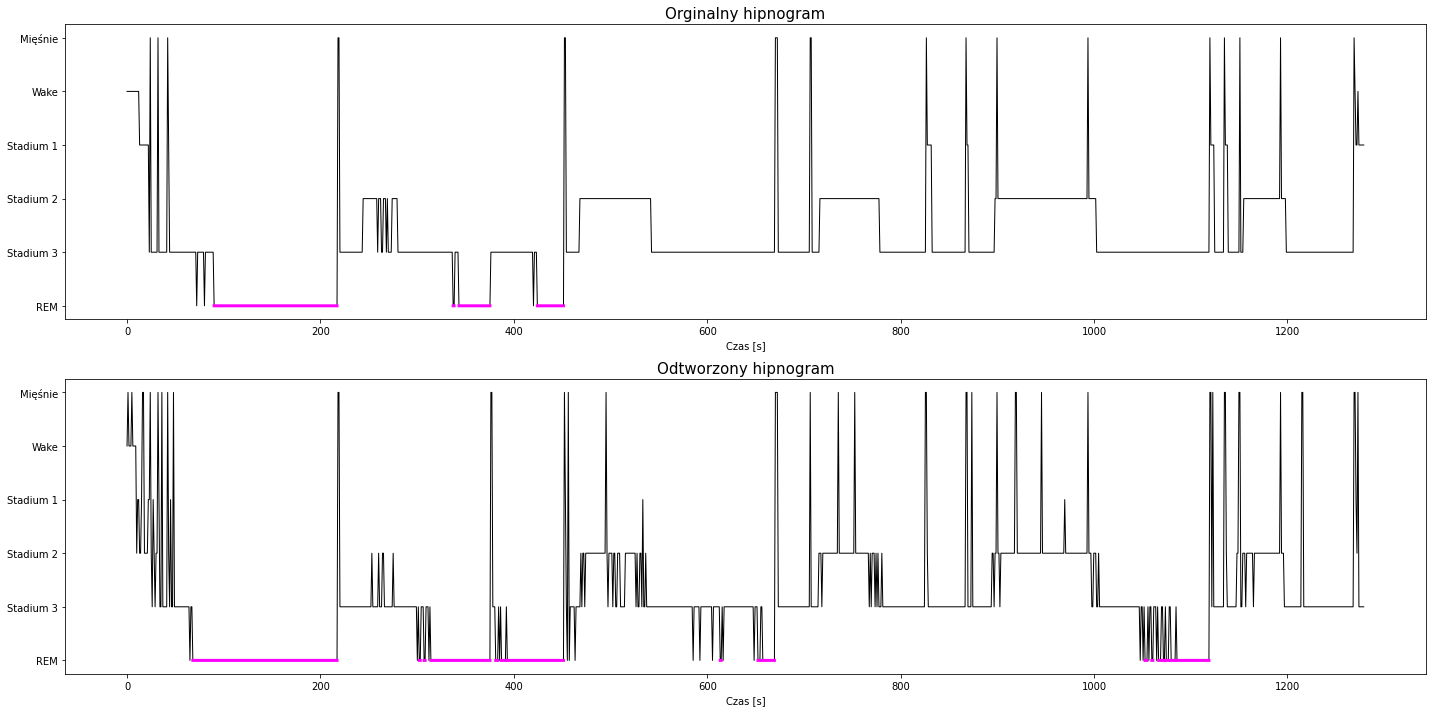

In [66]:
### hipnogram

# labels = ['REM', 'Stadium 4', 'Stadium 3', 'Stadium 2', 'Stadium 1', 'Wake', 'Mięśnie']
# classes = [0, 1, 2, 3, 4, 5, 6]

# AASM
labels = ['REM', 'Stadium 3', 'Stadium 2', 'Stadium 1', 'Wake', 'Mięśnie']
classes = [0, 1, 2, 3, 4, 5]

t = np.linspace(0, len(y_true), len(y_true))

plt.figure(figsize=(20,10))

plt.subplot(2,1,1)
masked_y = np.ma.masked_where(~(y_true == 0), y_true)

plt.plot(t, y_true, 'black', linewidth=1)
plt.plot(t, masked_y, 'magenta', linewidth=3)
plt.title("Orginalny hipnogram", size=15)
plt.yticks(classes,labels)
plt.xlabel('Czas [s]')


plt.subplot(2,1,2)
masked_y_BENDR = np.ma.masked_where(~(y_BENDR==0), y_BENDR)

plt.plot(t, y_BENDR, 'black', linewidth=1)
plt.plot(t, masked_y_BENDR, 'magenta', linewidth=3)
plt.title("Odtworzony hipnogram", size=15)
plt.yticks(classes,labels)
plt.xlabel('Czas [s]')


plt.tight_layout()
plt.show()

In [39]:
# wykres accuracy(ilosc wystąpień) 

from collections import Counter

z = dict(Counter(y_true))
sorted_dict = dict(sorted(z.items()))
print(sorted_dict)

MM = [mean_conf[i,i] for i in range(len(labels))]
print(MM)

{0: 194, 1: 706, 2: 310, 3: 33, 4: 15, 5: 21}
[0.9257156987040819, 0.706840025137086, 0.8377905169166522, 0.4099091355493551, 0.7631293125479172, 0.6112275011687704]


NameError: name 'counts' is not defined

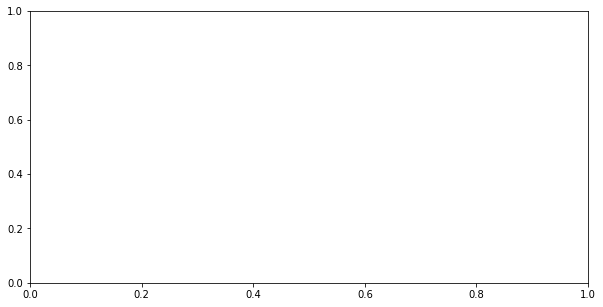

In [40]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(counts, MM)
ax.set_xlabel('Liczba reprezentantów danej klasy')
ax.set_ylabel('Accuracy')

for i, txt in enumerate(labels):
    ax.annotate(txt, (counts[i] + 10, MM[i]))

In [ ]:
### NAJLEPSZE I NAJGORSZE PREDYKCJE + WYKREŚLENIE

In [ ]:
### dla wersji gdzie zapisujemy softmax

# uśrednione po ludziach:

pred_path = 'predictions/BENDR-polid-AASM-hpf05_emg'
test_subjects = os.listdir(pred_path)

# AASM
labels = ['REM', 'Stadium 3', 'Stadium 2', 'Stadium 1', 'Wake', 'Mięśnie']
classes = [0, 1, 2, 3, 4, 5]

# labels = ['REM', 'Stadium 4', 'Stadium 3', 'Stadium 2', 'Stadium 1', 'Wake', 'Mięśnie']
# classes = [0, 1, 2, 3, 4, 5, 6]
ACC = 0
BAC = 0
MCC = 0

conf_matrix = np.zeros((len(test_subjects)//2, len(labels), len(labels)))

for i, sub in enumerate(test_subjects):
    
    i //= 2
    
    if sub.split("_")[-1] == 'softmax.npy':
        continue
        
    # predicted tags
    in_and_out = np.load(os.path.join(pred_path, sub))

    y_true = in_and_out[0]
    y_BENDR = in_and_out[1]
    
    conf_matrix[i, : ,:] = confusion_matrix(y_true, y_BENDR, labels=classes, normalize='true') # true
    
    MCC += matthews_corrcoef(y_true, y_BENDR)
    ACC += accuracy_score(y_true, y_BENDR)
    BAC += balanced_accuracy_score(y_true, y_BENDR)
    
    print(i)
    print(accuracy_score(y_true, y_BENDR))
    print(balanced_accuracy_score(y_true, y_BENDR))

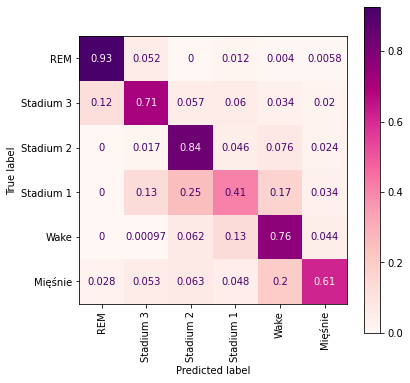

In [41]:
mean_conf = np.mean(conf_matrix, axis = 0)
std_conf = np.std(conf_matrix, axis = 0)


disp = ConfusionMatrixDisplay(confusion_matrix=mean_conf, display_labels=labels)
disp.plot(cmap='RdPu')
plt.xticks(rotation=90)
plt.show()

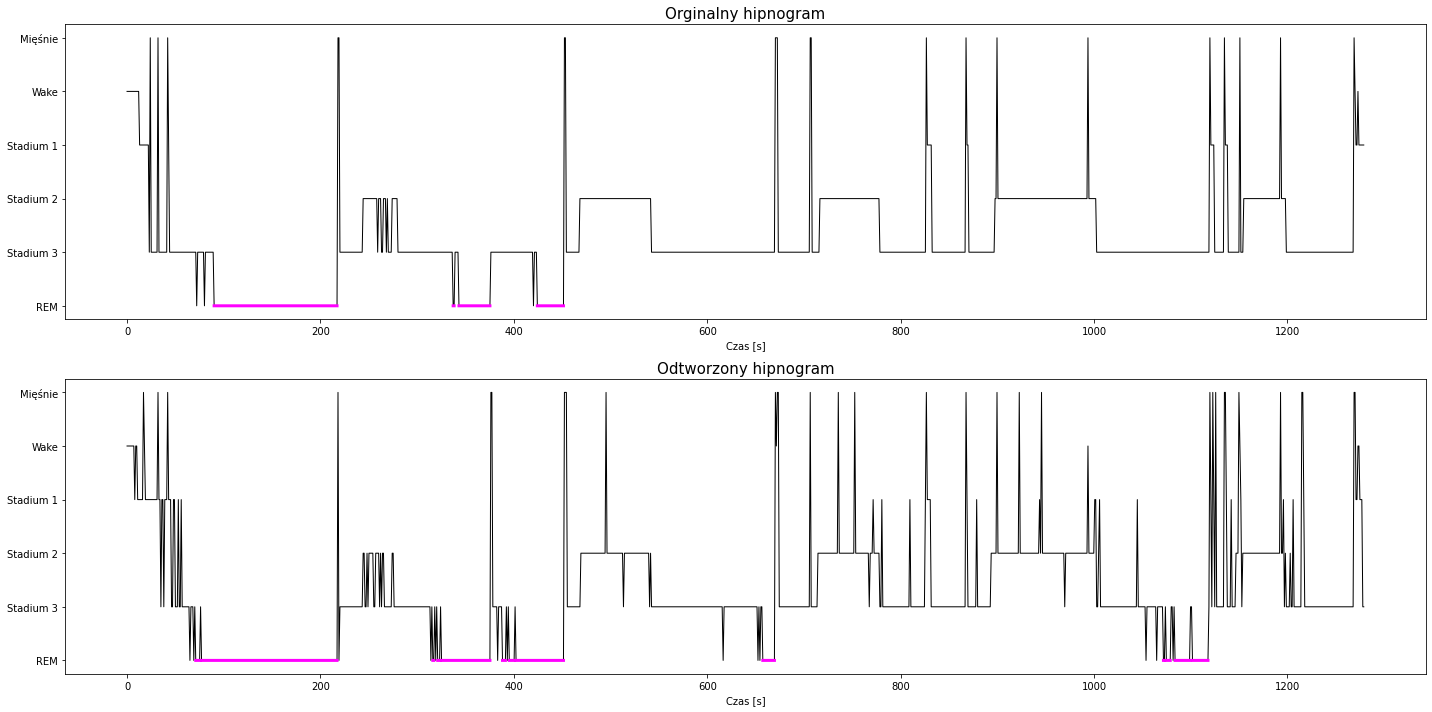

In [73]:
# labels = ['REM', 'Stadium 4', 'Stadium 3', 'Stadium 2', 'Stadium 1', 'Wake', 'Mięśnie']
# classes = [0, 1, 2, 3, 4, 5, 6]

# AASM
labels = ['REM', 'Stadium 3', 'Stadium 2', 'Stadium 1', 'Wake', 'Mięśnie']
classes = [0, 1, 2, 3, 4, 5]

t = np.linspace(0, len(y_true), len(y_true))

plt.figure(figsize=(20,10))

plt.subplot(2,1,1)
masked_y = np.ma.masked_where(~(y_true == 0), y_true)

plt.plot(t, y_true, 'black', linewidth=1)
plt.plot(t, masked_y, 'magenta', linewidth=3)
plt.title("Orginalny hipnogram", size=15)
plt.yticks(classes,labels)
plt.xlabel('Czas [s]')


plt.subplot(2,1,2)
masked_y_BENDR = np.ma.masked_where(~(y_BENDR==0), y_BENDR)

plt.plot(t, y_BENDR, 'black', linewidth=1)
plt.plot(t, masked_y_BENDR, 'magenta', linewidth=3)
plt.title("Odtworzony hipnogram", size=15)
plt.yticks(classes,labels)
plt.xlabel('Czas [s]')


plt.tight_layout()
plt.show()

In [68]:
### softmax

### dla wersji gdzie zapisujemy softmax

# dla wybranej osoby np. s29 bo ma ładne wyniki

pred_path = 'predictions/BENDR-polid-AASM-hpf05_emg/BENDR-polid-AASM-hpf05_emg' + '_s29.npy'
pred_softmax_path = 'predictions/BENDR-polid-AASM-hpf05_emg/BENDR-polid-AASM-hpf05_emg' + '_s29_softmax.npy'
 
# test_subject = os.listdir(pred_path)

# AASM
labels = ['REM', 'Stadium 3', 'Stadium 2', 'Stadium 1', 'Wake', 'Mięśnie']
classes = [0, 1, 2, 3, 4, 5]

# labels = ['REM', 'Stadium 4', 'Stadium 3', 'Stadium 2', 'Stadium 1', 'Wake', 'Mięśnie']
# classes = [0, 1, 2, 3, 4, 5, 6]
# ACC = 0
# BAC = 0
# MCC = 0

# conf_matrix = np.zeros((len(test_subjects)//2, len(labels), len(labels)))

in_and_out_labels = np.load(pred_path)
                     
y_true = in_and_out_labels[0]
y_BENDR = in_and_out_labels[1]
predictions_softmax = np.load(pred_softmax_path)

print(predictions_softmax)

conf_matrix = confusion_matrix(y_true, y_BENDR, labels=classes, normalize='true') # true

MCC = matthews_corrcoef(y_true, y_BENDR)
ACC = accuracy_score(y_true, y_BENDR)
BAC = balanced_accuracy_score(y_true, y_BENDR)

print(accuracy_score(y_true, y_BENDR))
print(balanced_accuracy_score(y_true, y_BENDR))

[[4.4419183e-05 7.6164945e-08 5.7006023e-06 9.3275776e-05 9.9982554e-01
  3.0955485e-05]
 [1.2048564e-04 3.8500562e-05 2.6810409e-03 2.4209086e-02 9.2063993e-01
  5.2310906e-02]
 [2.1918237e-05 4.8081642e-07 7.9341798e-06 1.6853888e-02 9.8309362e-01
  2.2115988e-05]
 ...
 [1.7670990e-04 3.0160869e-02 2.9842502e-02 9.3860853e-01 1.1358625e-03
  7.5495154e-05]
 [5.2191643e-03 8.0381942e-01 4.8277609e-02 1.4253937e-01 7.4762749e-05
  6.9619316e-05]
 [3.2459856e-03 9.5383090e-01 6.0243555e-04 4.2280078e-02 3.6862528e-07
  4.0389856e-05]]
0.815480844409695
0.7928802060895636


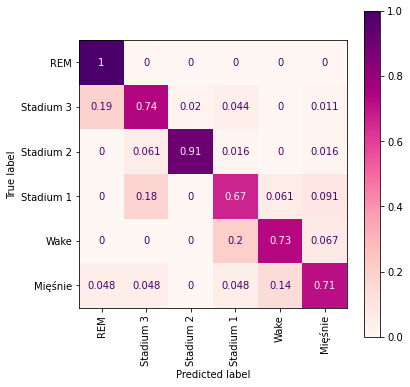

In [69]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)


disp.plot(cmap='RdPu')
plt.xticks(rotation=90)
plt.show()

In [70]:
# load examplatory signal

signal_path = '/dmj/fizmed/jjakubowska/dane-nowowiejska/edfs_AASM/dataset/test/s29/inb14.edf'
raw = mne.io.read_raw_edf(signal_path)
picks = ['Fp1', 'Fpz', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T7', 'C3', 'Cz', 'C4', 'T8', 'P7', 'P3', 'Pz', 'P4', 'P8', 'O1', 'Oz', 'O2', 'A1', 'A2']  


raw_highpass = raw.copy().load_data()
raw_highpass.filter(l_freq=1, h_freq=15, picks = picks)


#raw_highpass.set_montage("standard_1020")

# raw_highpass.plot(duration=20, start=20*ind, n_channels=len(raw.ch_names))

Extracting EDF parameters from /dmj/fizmed/jjakubowska/dane-nowowiejska/edfs_AASM/dataset/test/s29/inb14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3274751  =      0.000 ... 25583.992 secs...
Filtering a subset of channels. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 15 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 15.00 Hz
- Upper transition bandwidth: 3.75 Hz (-6 dB cutoff frequency: 16.88 Hz)
- Filter length: 423 samples (3.305 sec)



<RawEDF | inb14.edf, 28 x 3274752 (25584.0 s), ~699.6 MB, data loaded>

In [71]:
# znajdz najwyższą predykcję z błędnych predykcji s3
    # znajdz najwyższą błędną predykcję
    # powinno być stadium 1, a predykacja na s3

def explore_best_predictions(raw1, y_true, y_BENDR, predictions_softmax, true=1, predicted=1):

    s3_false_positive_s1 = [i for i in range(len(y_true)) if (y_true[i]==true) and (y_BENDR[i]==predicted)]
    s3_preds_false_positive_s1 = np.max(predictions_softmax[s3_false_positive_s1], axis=1)
    s3_preds_false_positive_s1_max = np.argmax(predictions_softmax[s3_false_positive_s1, 1])
    ind_false_pred = s3_false_positive_s1[s3_preds_false_positive_s1_max]

    print(f'Maksymalna zła predykcja: {predictions_softmax[s3_false_positive_s1[s3_preds_false_positive_s1_max]]} dla ind = {ind_false_pred}')

    raw1.plot(duration=20, start=20*ind_false_pred, n_channels=len(raw.ch_names))

Maksymalna zła predykcja: [1.06132375e-02 2.65772920e-02 9.80486628e-04 1.46843093e-02
 7.49121129e-04 9.46395576e-01] dla ind = 453


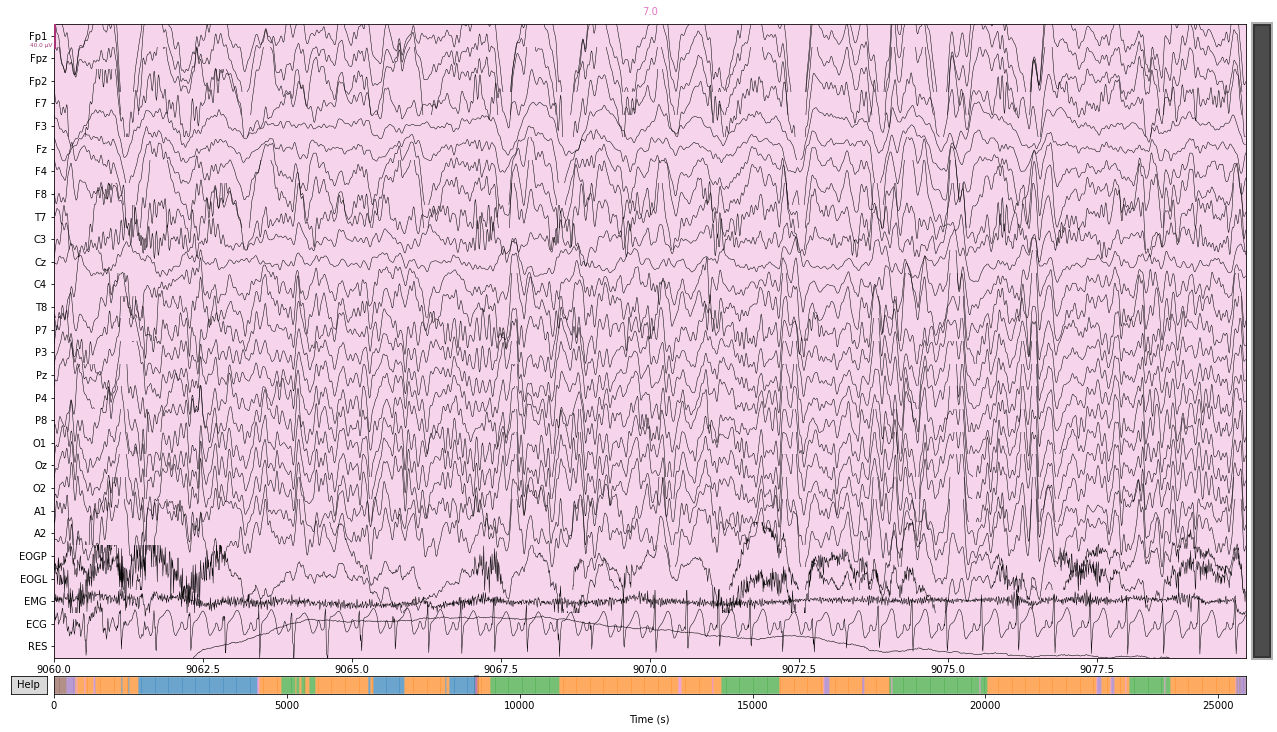

In [72]:
plt.rcParams["figure.figsize"] = [18,10]
explore_best_predictions(raw_highpass, y_true, y_BENDR, predictions_softmax, true=5, predicted=5)

In [48]:
# montaż

data = raw_highpass.get_data()
print(data.shape)

# 22, 21 to A1 i A2
A1 = data[21, :] * 10**6
A2 = data[22, :] * 10**6
print((A1+A2)/2)
print(data[0,:])
data -= (data[21, :] + data[22, :]) / 2

(28, 3274752)
[ 8.47032947e-16  2.13595192e+01  3.67183767e+01 ... -1.03737825e+00
 -4.99985404e-01  4.87043945e-15]
[-2.54109884e-21  2.20795965e-05  3.80804955e-05 ... -7.17140037e-07
 -3.35503255e-07  1.90582413e-21]


In [49]:
signal = raw_highpass.copy()

def f(arr, a1=A1, a2=A2):
    
    print('A1+A2 / 2 = ', (a1 + a2)/2)
    arr *= 10**6
    print('arr = ', arr)
    
    arr = arr - ((a1 + a2)/2)
    print(arr)
    return arr / 10**6


picks = ['Fp1', 'Fpz', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T7', 'C3', 'Cz', 'C4', 'T8', 'P7', 'P3', 'Pz', 'P4', 'P8', 'O1', 'Oz', 'O2']    

signal.apply_function(f, picks, channel_wise=True)
print(signal.get_data()[0,:])

A1+A2 / 2 =  [ 8.47032947e-16  2.13595192e+01  3.67183767e+01 ... -1.03737825e+00
 -4.99985404e-01  4.87043945e-15]
arr =  [-2.54109884e-15  2.20795965e+01  3.80804955e+01 ... -7.17140037e-01
 -3.35503255e-01  1.90582413e-15]
[-3.38813179e-15  7.20077290e-01  1.36211875e+00 ...  3.20238209e-01
  1.64482149e-01 -2.96461532e-15]
A1+A2 / 2 =  [ 8.47032947e-16  2.13595192e+01  3.67183767e+01 ... -1.03737825e+00
 -4.99985404e-01  4.87043945e-15]
arr =  [-5.92923063e-15  2.21381101e+01  3.82527734e+01 ... -9.40444051e-01
 -4.59209999e-01  5.08219768e-15]
[-6.77626358e-15  7.78590900e-01  1.53439664e+00 ...  9.69341949e-02
  4.07754050e-02  2.11758237e-16]
A1+A2 / 2 =  [ 8.47032947e-16  2.13595192e+01  3.67183767e+01 ... -1.03737825e+00
 -4.99985404e-01  4.87043945e-15]
arr =  [ 5.08219768e-15  2.18359945e+01  3.76769345e+01 ... -1.04368791e+00
 -5.25637562e-01  4.23516474e-16]
[ 4.23516474e-15  4.76475258e-01  9.58557752e-01 ... -6.30966090e-03
 -2.56521580e-02 -4.44692297e-15]
A1+A2 / 2 =  

Maksymalna zła predykcja: [1.06132375e-02 2.65772920e-02 9.80486628e-04 1.46843093e-02
 7.49121129e-04 9.46395576e-01] dla ind = 453


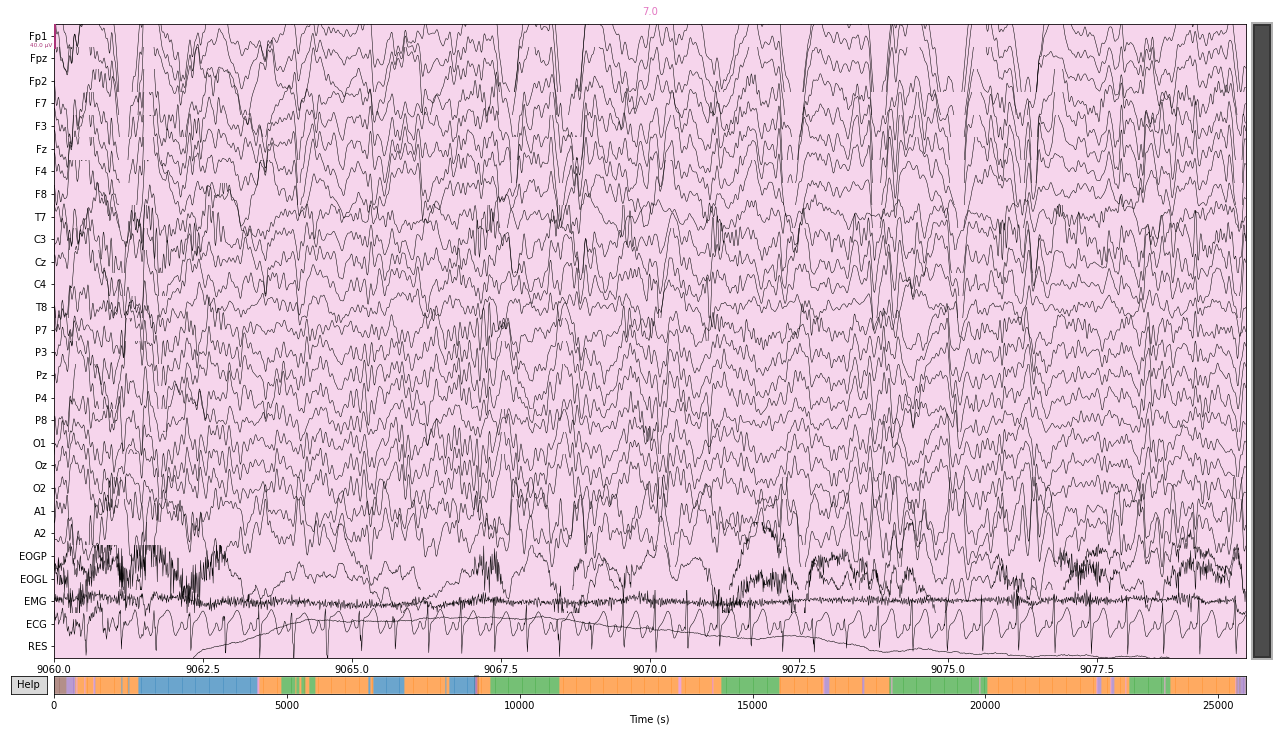

In [50]:
explore_best_predictions(signal, y_true, y_BENDR, predictions_softmax, true=5, predicted=5)